# Multiple Linear Regression
Single Target Mutiple Predictors

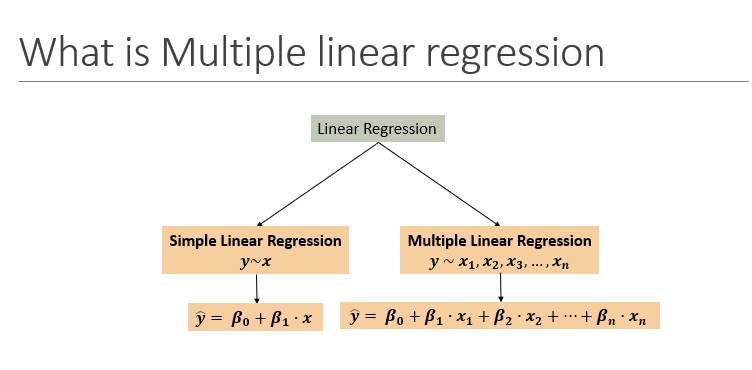

### Step 1 - Data Ingestion

In [1]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT ~ RND, ADMIN, MKT
### PROFIT_pred = B0 + B1 x RND + B2 x ADMIN + B3 x MKT

### Step 2 - Perform Basic Data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Visualize data

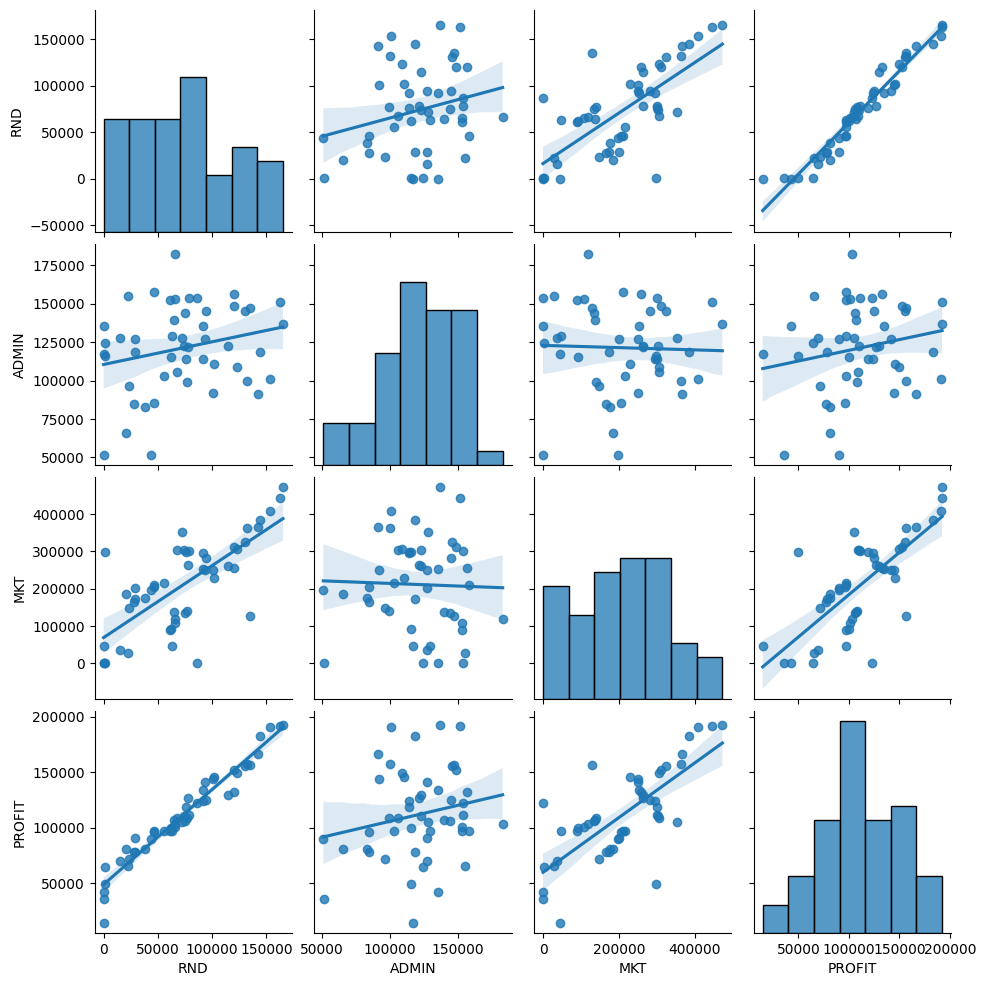

In [5]:
import seaborn as sns
sns.pairplot(df, kind="reg")

In [6]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


### Step 4 - Seperate X (RND, ADMIN, MKT) , Y(PROFIT)

In [13]:
X = df[["RND", "ADMIN", "MKT"]]
Y = df[["PROFIT"]]

In [14]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 5- Create a LinearReg model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [19]:
model.intercept_

array([50122.19298987])

In [20]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [21]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

### PROFIT_Pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT 

1. If RND increase by 1 unit Profit will increase by 0.8057 units
2. If ADMIN increase by 1 unit Profit will decrease by 0.0268 units
3. If MKT incrases by 1 unit Profit will increase by 0.0272 units

### From Above results RND is having most impact here becuse it has highest coef

In [18]:
# R2 score for model
model.score(X, Y)

0.9507459940683246